In [ ]:
pip install pennylane


This Python class `Converter` takes a Qiskit `QuantumCircuit` object as input and provides a method `convert` that returns a Pennylane `QNode` object. The `QNode` is constructed using a quantum function `qfunc` that translates each gate in the input Qiskit circuit into the corresponding Pennylane operation. The `QNode` is set to calculate the expectation value of the PauliZ operator on the zeroth qubit. The device used for the `QNode` is `default.qubit`, as specified.

The `convert` method iterates over the data of the Qiskit circuit, which contains the instructions (gates), the qubits they apply to, and the classical bits (which are ignored in this case since we are only interested in gate operations). For each gate, the method checks the gate name and applies the corresponding Pennylane operation to the specified qubits. If a gate is encountered that is not supported by the converter, a `ValueError` is raised.

The sample input creates a Qiskit circuit with two qubits, applies a Hadamard gate to the first qubit, and then a CNOT gate with the first qubit as the control and the second qubit as the target. The `Converter` class is then used to convert this circuit into a Pennylane `QNode`. The expected output is a visualization of the resulting `QNode` using Pennylane's drawing capabilities.

In [1]:
import pennylane as qml
from qiskit import QuantumCircuit

In [10]:

class Converter:
    def __init__(self, qc):
        self.qc = qc

    def convert(self):
        # Create a PennyLane device
        dev = qml.device("default.qubit", wires=self.qc.num_qubits)

        @qml.qnode(dev)
        def circuit():
            # Apply Qiskit gates to PennyLane QNode
            for instruction in self.qc.data:
                if instruction[0].name == 'h':
                    qml.Hadamard(wires=instruction[1][0].index)
                elif instruction[0].name == 'cx':
                    qml.CNOT(wires=[q.index for q in instruction[1]])

            # Measure expectation value of PauliZ on the zeroth qubit
            return qml.expval(qml.PauliZ(0))

        return circuit


# Sample Input
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Expected Script
converter = Converter(qc=qc)
qnode = converter.convert()

# Expected Output
qml.drawer.use_style("default")
print(qml.draw(qnode)())


0: ──H─╭●─┤  <Z>
1: ────╰X─┤     


/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_27830/1166029652.py:14: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  qml.Hadamard(wires=instruction[1][0].index)
/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_27830/1166029652.py:16: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  qml.CNOT(wires=[q.index for q in instruction[1]])


Using a slightly different using a `for` loop to convert a quanutm function to construct `QNode`

In [13]:

class Converter:
    def __init__(self, qc: QuantumCircuit):
        self.qc = qc

    def convert(self):
        # Create a device with the default.qubit backend
        dev = qml.device('default.qubit', wires=self.qc.num_qubits)

        # Define the quantum function that constructs the QNode
        def qfunc():
            # Convert Qiskit gates to Pennylane operations
            for instr, qargs, _ in self.qc.data:
                qubits = [qubit.index for qubit in qargs]
                gate_name = instr.name

                # Map the Qiskit gate to the corresponding Pennylane operation
                if gate_name == 'h':
                    qml.Hadamard(wires=qubits)
                elif gate_name == 'cx':
                    qml.CNOT(wires=qubits)
                elif gate_name == 'rx':
                    angle = instr.params[0]
                    qml.RX(angle, wires=qubits)
                elif gate_name == 'ry':
                    angle = instr.params[0]
                    qml.RY(angle, wires=qubits)
                elif gate_name == 'rz':
                    angle = instr.params[0]
                    qml.RZ(angle, wires=qubits)
                # Add more gates as needed
                else:
                    raise ValueError(f"Gate {gate_name} is not supported by the converter")

            # Add the PauliZ expectation value calculation for the zeroth qubit
            return qml.expval(qml.PauliZ(0))

        # Create and return the QNode
        return qml.QNode(qfunc, dev)

In [14]:
# Using the Converter class
converter = Converter(qc=qc)
qnode = converter.convert()

In [15]:
# Sample Input
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

/var/folders/z3/5wtht_qx4ylbrx748h07ps780000gn/T/ipykernel_1414/1939873578.py:13: DeprecationWarning: The property ``qiskit.circuit.bit.Bit.index`` is deprecated as of qiskit-terra 0.17. It will be removed no earlier than 3 months after the release date. Instead, use :meth:`~qiskit.circuit.quantumcircuit.QuantumCircuit.find_bit` to find all the containing registers within a circuit and the index of the bit within the circuit.
  qubits = [qubit.index for qubit in qargs]


(<Figure size 500x300 with 1 Axes>, <Axes: >)

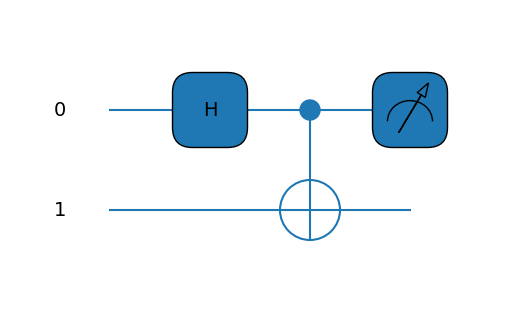

In [16]:
# Expected Output
qml.drawer.use_style("default")
qml.draw_mpl(qnode)()


Citations:

[1] https://docs.pennylane.ai/en/stable/development/release_notes.html

[2] https://docs.pennylane.ai/en/stable/code/api/pennylane.from_qiskit.html

[3] https://www.oreilly.com/library/view/qiskit-pocket-guide/9781098112462/ch01.html

[4] https://pypi.org/project/qiskit/